# Multiple Linear Regression:




Necessary Imports

In [1]:
# Necessary imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10.0, 10.0)
import warnings
warnings.simplefilter("ignore")

# 1. Data Understanding, Cleaning and Transformation:

The given dataset gives contains the list of video games along with the sales of the game in various regions as well as the overall sales all over the globe. The data set has a total of 16598 rows and a total of 10 columns.

In the given dataset,  `Global_Sales` is the dependent variable (y) while `NA_Sales, EU_Sales, JP_Sales, Other_Sales` are the independent variables (x).

`Global_Sales` is the depedent variable since the amount in each row of the column is derived by adding up all the data of row from the independent columns i.e. `NA_Sales, EU_Sales, JP_Sales, Other_Sales`.




Reading the dataset using `read_csv()` function from pandas.

In [2]:
df = pd.read_csv('GameSales.csv')

Printing the top 5 and bottom 5 rows of the dataset. Using `head()` function of pandas to print the top section, while using `tail()` function of pandas to print the bottom section.

In [3]:
df.head()

,Rank,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df.tail()

,Rank,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


Printing the information of the dataset. Using `info()` function of pandas to do so.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Genre         16598 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.3+ MB


Using the `df.shape` to calculate the number of rows and columns in the dataset

In [6]:
df.shape

(16598, 10)

Checking if any null value exists in the dataset using `df.isnull()`

In [7]:
df.isnull()

,Rank,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
16593,False,False,False,False,False,False,False,False,False,False
16594,False,False,False,False,False,False,False,False,False,False
16595,False,False,False,False,False,False,False,False,False,False
16596,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

Rank             0
Name             0
Platform         0
Genre            0
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

Data Cleaning by dropping the columns that are not required. Using `drop()` function of pandas to do so.

In [9]:
forDropping = ["Rank","Name","Platform","Genre","Publisher"]
for items in forDropping:
  df.drop([items],axis=1,inplace=True)
df.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,41.49,29.02,3.77,8.46,82.74
1,29.08,3.58,6.81,0.77,40.24
2,15.85,12.88,3.79,3.31,35.82
3,15.75,11.01,3.28,2.96,33.00
4,11.27,8.89,10.22,1.00,31.37


Representing the remaining columns in the form of a heatmap. Using seaborn library's heatmap function to do so.

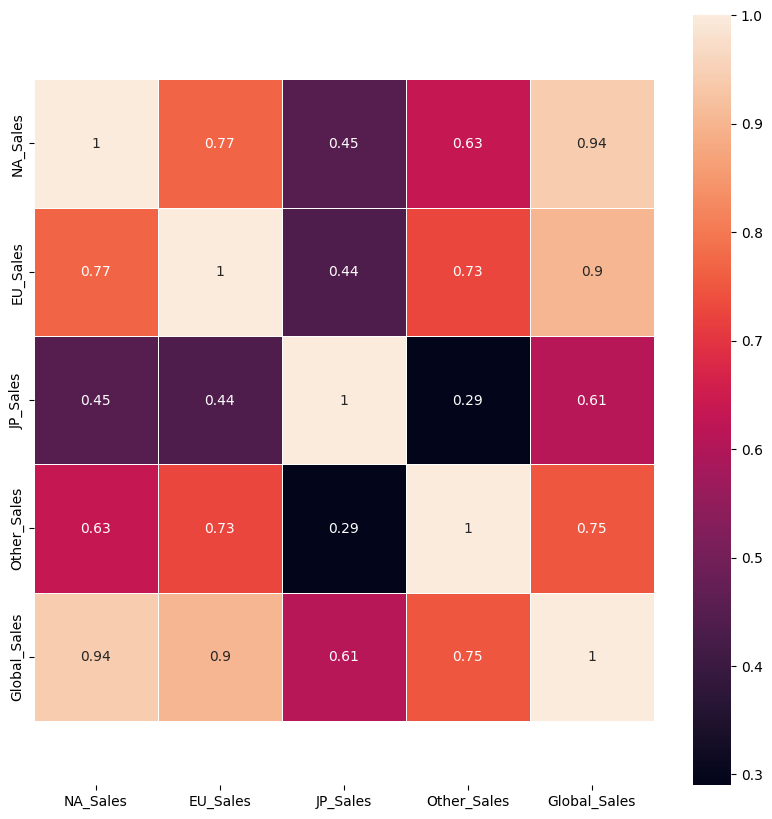

In [10]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#Plotting heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,linewidths=.5)
b, t = plt.ylim() # Finding the values for bottom and top
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.show()

Converting each column to array using `.to_numpy()`

In [11]:
NA = df["NA_Sales"].to_numpy()

In [12]:
EU = df["EU_Sales"].to_numpy()

In [13]:
JP = df["JP_Sales"].to_numpy()

In [14]:
other = df["Other_Sales"].to_numpy()

In [15]:
globalSales = df["Global_Sales"].to_numpy()

Mean of the dependent variable.

In [16]:
mean_y =df["Global_Sales"].mean()
print("Dependent mean =",mean_y)

Dependent mean = 0.5374406555006628


In [17]:
independentColumns = ["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]

Mean of the independent variables.

In [18]:
print("Mean of independent:")
for columns in independentColumns:
  print("Mean of",columns,":",df[columns].mean())

Mean of independent:
Mean of NA_Sales : 0.26466742981082064
Mean of EU_Sales : 0.14665200626581515
Mean of JP_Sales : 0.077781660441017
Mean of Other_Sales : 0.0480630196409206


Checking to confirm everything so far is right.

In [19]:
# Sanity Check
if NA.shape == EU.shape == JP.shape == other.shape == globalSales.shape:
  print("Proceed Further")
else:
  print("Array Conversion Error: Try Again")

Proceed Further


# 2. Data Analysis and Visualization

3D scatter-plot

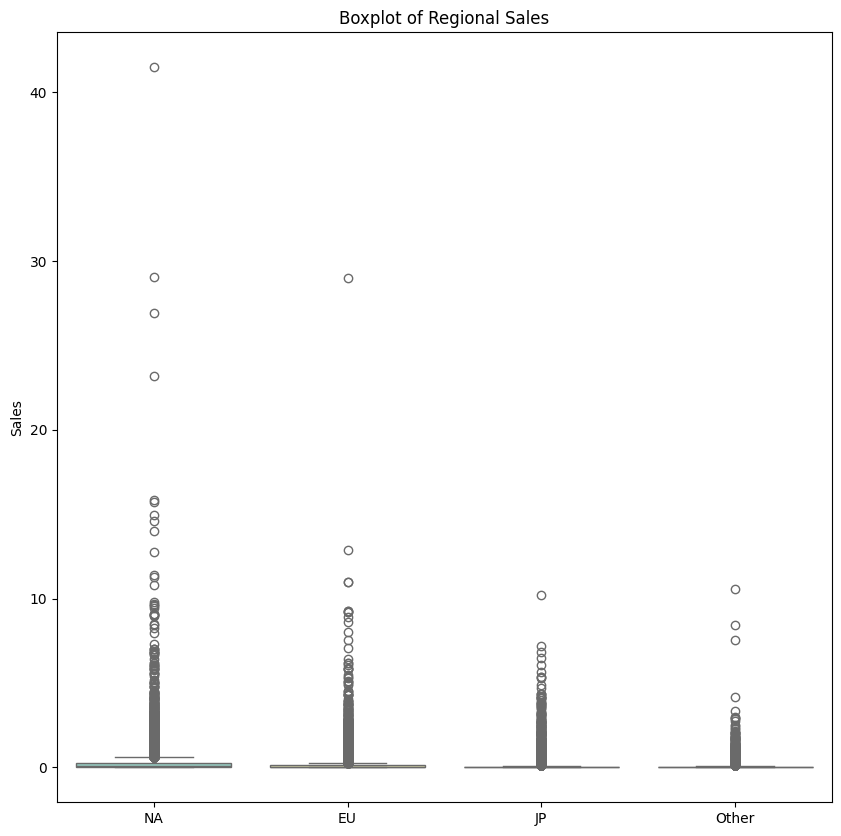

In [20]:
sns.boxplot(data=[NA, EU, JP, other], palette="Set3")
plt.xticks([0, 1, 2, 3], ['NA', 'EU', 'JP', 'Other'])
plt.ylabel("Sales")
plt.title("Boxplot of Regional Sales")
plt.show()



The box plot shows that North America (NA) has the highest variability in sales, with several outliers indicating extremely successful products, while other regions like EU, JP, and Other have more consistent but lower sales distributions.

# 3. Build Primary Model:

In [21]:
x0 = np.ones(len(NA))
X2 = np.array([x0,NA,EU,JP,other]).T
W = np.array([0,0,0,0,0])
Y2 = np.array(globalSales)
print(X2.shape)
print(Y2.shape)
print(W.shape)

(16598, 5)
(16598,)
(5,)


Defining the cost function

In [22]:
def cost_function(X, Y, W):
    """ Parameters:
    This function finds the Mean Square Error.
    Input parameters:
      X: Feature Matrix
      Y: Target Matrix
      W: Weight Matrix
    Output Parameters:
      J: accumulated mean square error.
    """
    m = len(Y) # len of the data in dataset

    J = np.sum((X.dot(W) - Y) ** 2)/(2 * m)
    return J

Calculating the initial cost

In [23]:
inital_cost = cost_function(X2, Y2, W)
inital_cost

np.float64(1.3534043258223882)

Function to calculate the gradient_descent

In [24]:
def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)

    for iteration in range(iterations):
        # Hypothesis Values
        Y_pred = X.dot(B)
        # Difference b/w Hypothesis and Actual Y
        loss = Y_pred - Y
        # Gradient Calculation
        dw = (X.T.dot(loss) ) / (m)
        # Changing Values of B using Gradient
        B = B - alpha * dw
        # New Cost Value
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost

    return B, cost_history

In [25]:
# 100000 Iterations
alpha = 0.0001 # Learning Rate.
new_weights, cost_history = gradient_descent(X2, Y2, W, alpha, 100000)

# New Values of
print(new_weights)

# Final Cost of our Iterations.
print(cost_history[-1])

[0.01410354 1.17432746 0.99539715 0.64560148 0.36941936]
0.009297354880582349


Visualizing the cost function (gradient descent)

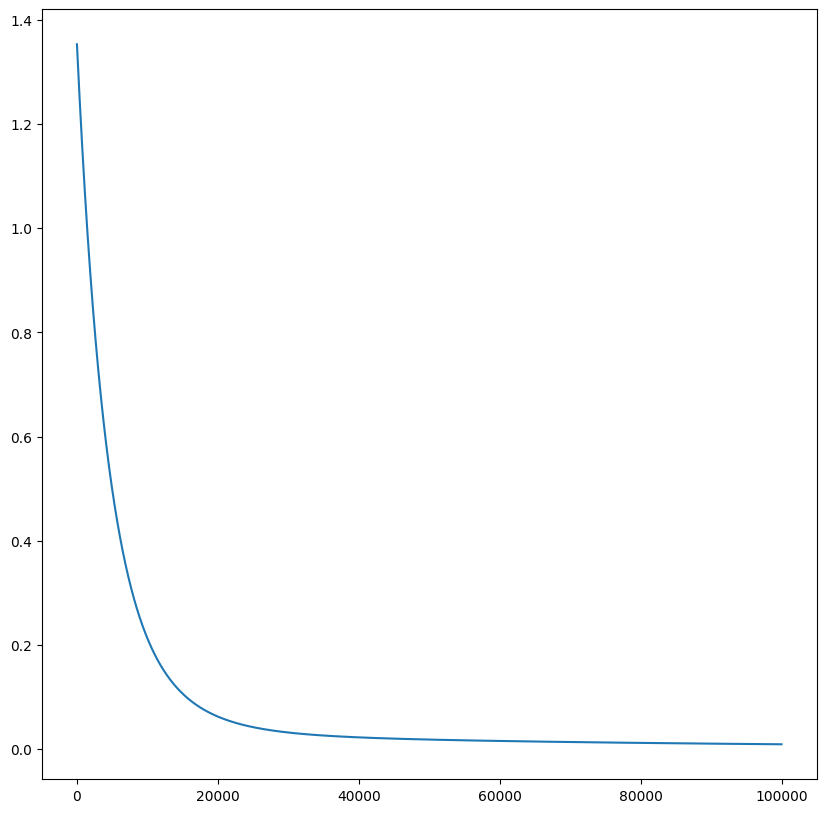

In [26]:
plt.plot(np.array(range(100000)), cost_history)
plt.show()

# 4. Model Evaluation

RMSE and R-Squared

In [27]:
# Model Evaluation - RMSE
def rmse(Y, Y_pred):
  """
  This Function calculates the Root Mean Squres.
  Input Arguments:
    Y: Array of actual(Target) Dependent Varaibles.
    Y_pred: Array of predeicted Dependent Varaibles.
  Output Arguments:
    rmse: Root Mean Square.
  """
  rmse = np.sqrt(sum((Y-Y_pred)**2)/len(Y))
  return rmse

# Model Evaluation - R2

def r2(Y, Y_pred):
  """
   This Function calculates the R Squared Error.
  Input Arguments:
    Y: Array of actual(Target) Dependent Varaibles.
    Y_pred: Array of predeicted Dependent Varaibles.
  Output Arguments:
    rsquared: R Squared Error.
    """
  mean_y = np.mean(Y)
  ss_tot = sum((Y - mean_y) ** 2)
  ss_res = sum((Y - Y_pred) ** 2)
  r2 = 1 - (ss_res / ss_tot)
  return r2


In [28]:
Y_pred = X2.dot(new_weights)

print("Root Mean Square Error =",rmse(Y2, Y_pred))
print("R-Squared =",r2(Y2, Y_pred))

Root Mean Square Error = 0.13636242063400633
R-Squared = 0.9923097726463417


In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X2, Y2, test_size=0.33, random_state=42)

In [30]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(11120, 5)
(11120,)
(5478, 5)
(5478,)


In [31]:
x0 = np.ones(len(x_train))
x = np.array([x0,x_train[:,0],x_train[:,1]]).T

Train - Test stats

In [32]:
print("{}% data is in the training set".format((len(x_train)/len(df))*100))
print("{}% data is in the testing set".format((len(x_test)/len(df))*100))

66.9960236173033% data is in the training set
33.003976382696706% data is in the testing set


RMSE and R-Squared using sklearn

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# X and Y Values
X = np.array([NA,EU,JP,other]).T
Y = np.array(globalSales)

# Model Intialization
reg = LinearRegression()
# Data Fitting
reg = reg.fit(X, Y)
# Y Prediction
Y_pred = reg.predict(X)

# Model Evaluation
rmse = np.sqrt(mean_squared_error(Y, Y_pred))
r2 = reg.score(X, Y)

print(rmse)
print(r2)

0.005221412757004432
0.999988724759158


# 5. Dimensionality Reduction:

In [34]:
#standardization
std = (df - df.mean())/df.std()

In [35]:
cov_mat = np.cov(std) #Calculating the covariance matrix
cov_mat

array([[ 3.29908357e+02, -2.39731310e+01,  8.46812193e+01, ...,
        -4.69692926e-01, -4.01762970e-01, -4.48034664e-01],
       [-2.39731310e+01,  1.73498495e+02, -1.08101233e+01, ...,
        -3.25965506e-01, -3.84572193e-01, -2.75019775e-01],
       [ 8.46812193e+01, -1.08101233e+01,  2.58919547e+01, ...,
        -1.28108490e-01, -9.87070499e-02, -1.28629212e-01],
       ...,
       [-4.69692926e-01, -3.25965506e-01, -1.28108490e-01, ...,
         1.56990349e-03,  1.57861837e-03,  1.47159036e-03],
       [-4.01762970e-01, -3.84572193e-01, -9.87070499e-02, ...,
         1.57861837e-03,  1.66564795e-03,  1.46819024e-03],
       [-4.48034664e-01, -2.75019775e-01, -1.28629212e-01, ...,
         1.47159036e-03,  1.46819024e-03,  1.40326353e-03]],
      shape=(16598, 16598))

Picking components for PCA

In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(std)
X_pca = pca.transform(std)

Calculating explained variance

In [37]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.73537719, 0.15113606, 0.0714624 ])

Calculating the cummulative explained variance and plotting the cummulative for all Principle Components.

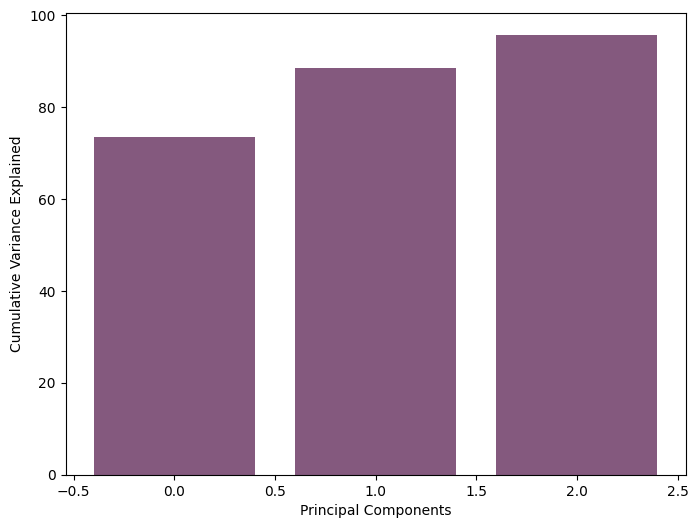

In [38]:
cum_exp_var = np.cumsum(np.round(explained_variance, decimals = 4)*100)
var_exp = 0

# Plotting cummulative explained variance for all PCs

fig, ax = plt.subplots(figsize=(8,6))
ax.bar(range(3), cum_exp_var,color='#84597e')
ax.set_xlabel('Principal Components')
ax.set_ylabel('Cumulative Variance Explained');

In [40]:
x0_after_pca = np.ones(len(X_pca[:, 0]))
X2_after_pca = np.array([x0_after_pca,X_pca[:, 0], X_pca[:, 1]]).T
W_after_pca = np.array([0,0,0])
Y2_after_pca = np.array(globalSales)
print(X2_after_pca.shape)
print(W_after_pca.shape)
print(Y2_after_pca.shape)

(16598, 3)
(3,)
(16598,)


In [41]:
inital_cost_after_pca = cost_function(X2_after_pca, Y2_after_pca, W_after_pca)
inital_cost_after_pca

np.float64(1.3534043258223882)

In [42]:
# 10000 Iterations
alpha_after_pca = 0.0001 # Learning Rate.
new_weights_after_pca, cost_history_after_pca = gradient_descent(X2_after_pca, Y2_after_pca, W_after_pca, alpha_after_pca, 100000)

# New Values of
print(new_weights_after_pca)

# Final Cost of our Iterations.
print(cost_history_after_pca[-1])

[0.53741627 0.80579823 0.04455158]
0.01458347033581815


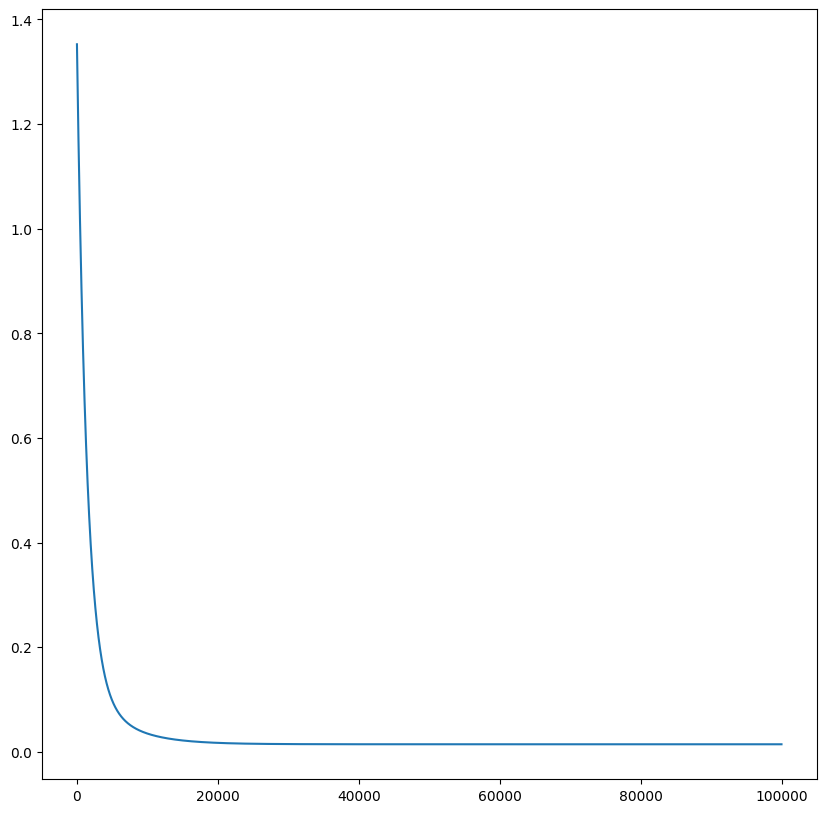

In [43]:
# visualizing cost function (gradient descent)
plt.plot(np.array(range(100000)), cost_history_after_pca)
plt.show()

In [44]:
Y_pred_after_pca = X2_after_pca.dot(new_weights_after_pca)

print("Root Mean Square Error =",rmse)
print("R-Squared =",r2)

Root Mean Square Error = 0.005221412757004432
R-Squared = 0.999988724759158


In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# X and Y Values
X = np.array([NA,EU,JP,other]).T
Y = np.array(globalSales)

# Model Intialization
reg = LinearRegression()
# Data Fitting
reg = reg.fit(X2_after_pca, Y2_after_pca)
# Y Prediction
Y_pred = reg.predict(X2_after_pca)

# Model Evaluation
rmse = np.sqrt(mean_squared_error(Y2_after_pca, Y_pred_after_pca))
r2 = reg.score(X2_after_pca, Y2_after_pca)

print(rmse)
print(r2)

0.1707833149685188
0.9879374079978124


In [46]:
from sklearn.model_selection import train_test_split
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(X2_after_pca, Y2_after_pca, test_size=0.33, random_state=42)

In [47]:
print("{}% data is in the training set".format((len(x_train_pca)/len(df))*100))
print("{}% data is in the testing set".format((len(x_test_pca)/len(df))*100))

66.9960236173033% data is in the training set
33.003976382696706% data is in the testing set


# 6. Conclusion

Before performing PCA, the RMSE is 0.005221412757004434, while the R-Squared is
0.999988724759158. After performing PCA, the RMSE is 0.1707833149685189, while the R-Squared is 0.9879374079978124.